In [6]:
import sys
print(sys.version)

3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:06:23) [MSC v.1942 64 bit (AMD64)]


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

# 0. Setup

## 0.1 Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

import joblib

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 1. Data Loading

## 1.1 Importing Data

In [9]:
df = pd.read_csv("SBAnational.csv")
df

C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\984380524.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [10]:
print("Value counts for 'MIS_Status' column:")
display(df['MIS_Status'].value_counts())

Value counts for 'MIS_Status' column:


MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

 * 'CHGOFF' stands for 'Charged Off', which means the loan has defaulted.
 * 'P I F' means 'Paid in Full'.



## 1.2 Check Data Types

In [11]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

# 2. Data Preprocessing

## 2.1 Handling Data Types

In [12]:
# Converting date columns to datetime
date_cols = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\3078605440.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\3078605440.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\3078605440.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [13]:
# Converting currency columns and removing $ sign
currency_cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for col in currency_cols:
  df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [14]:
print('New data types:')
df.dtypes

New data types:


LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

## 2.2. Handling Missing Values

In [15]:
missing_df = df.isnull().sum()
missing_df

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [16]:
missing_percentage = missing_df / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

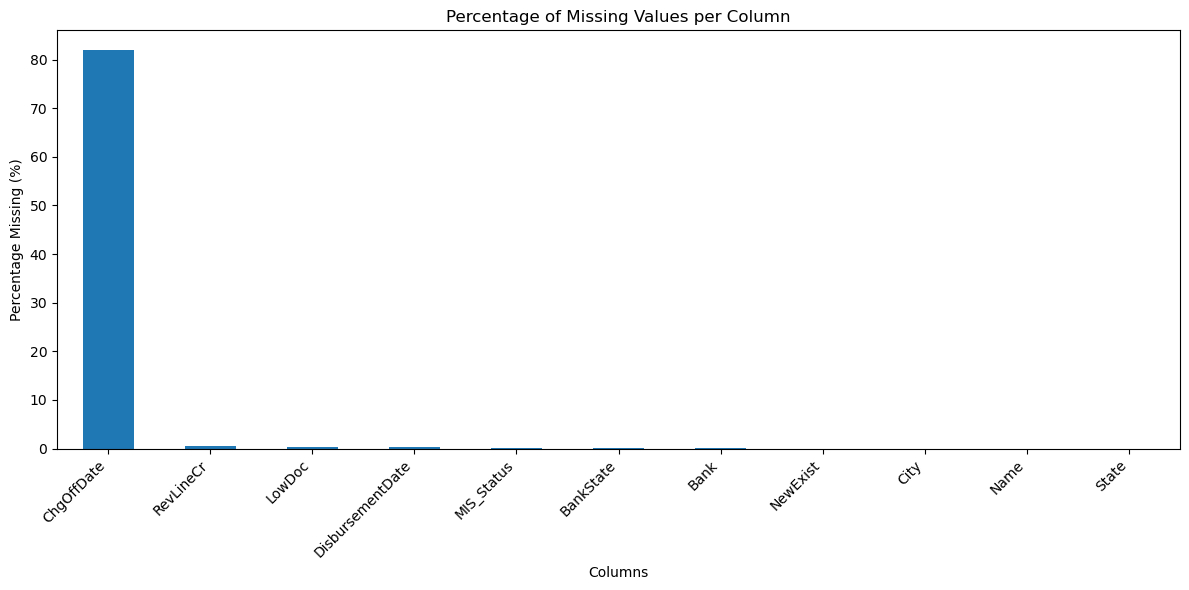

In [17]:
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Handling missing values

def handle_missing_values(df):
  df = df.copy()
  df = df.dropna(subset=["MIS_Status"])
  df["RevLineCr"] = df["RevLineCr"].fillna("N")
  df["LowDoc_missing_flag"] = df["LowDoc"].isna().astype(int)
  df["LowDoc"] = df["LowDoc"].fillna("N")
  df = df.dropna(subset=["DisbursementDate"])
  df["Bank"] = df["Bank"].fillna("Unknown")
  df["BankState"] = df["BankState"].fillna("Unknown")
  df["NewExist_missing_flag"] = df["NewExist"].isna().astype(int)
  df["NewExist"] = df["NewExist"].fillna(1)

  for col in ["City", "State", "Name"]:
      df[col] = df[col].fillna("Unknown")

  return df

# Apply the function
df = handle_missing_values(df)

In [19]:
df["NAICS"] = df["NAICS"].astype(str)
df["NAICS"] = df["NAICS"].replace("0", pd.NA)
df["NAICS"] = df["NAICS"].fillna("Unknown")

df["NAICS_2"] = df["NAICS"].astype(str).str[:2]

In [20]:
df.isnull().sum()

# Verify missing values after handling
missing_after = df.isnull().sum()
missing_after_filtered = missing_after[missing_after > 0].sort_values(ascending=False)
print("Remaining missing values:")
display(missing_after_filtered)

Remaining missing values:


ChgOffDate    732888
dtype: int64

In [21]:
print("Value counts for 'MIS_Status' column:")
display(df['MIS_Status'].value_counts())

Value counts for 'MIS_Status' column:


MIS_Status
P I F     737760
CHGOFF    157232
Name: count, dtype: int64

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

In [22]:
# Basic Overview
df.shape, df.dtypes

((894992, 30),
 LoanNr_ChkDgt                     int64
 Name                             object
 City                             object
 State                            object
 Zip                               int64
 Bank                             object
 BankState                        object
 NAICS                            object
 ApprovalDate             datetime64[ns]
 ApprovalFY                       object
 Term                              int64
 NoEmp                             int64
 NewExist                        float64
 CreateJob                         int64
 RetainedJob                       int64
 FranchiseCode                     int64
 UrbanRural                        int64
 RevLineCr                        object
 LowDoc                           object
 ChgOffDate               datetime64[ns]
 DisbursementDate         datetime64[ns]
 DisbursementGross               float64
 BalanceGross                    float64
 MIS_Status                       object
 

In [23]:
# Summary Statistics
df.describe()

,LoanNr_ChkDgt,Zip,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,LowDoc_missing_flag,NewExist_missing_flag
count,8.949920e+05,894992.000000,894992,894992.000000,894992.000000,894992.000000,894992.000000,894992.000000,894992.000000,894992.000000,162104,894992,8.949920e+05,894992.000000,8.949920e+05,8.949920e+05,8.949920e+05,894992.000000,894992.000000
mean,4.775981e+09,53868.115916,2001-06-01 20:49:05.864097536,110.949888,11.419495,1.280386,8.439696,10.799482,2760.629801,0.756791,2008-07-11 05:53:49.571139328,2001-09-23 00:47:43.485706880,2.018113e+05,3.003284,1.352837e+04,1.932738e+05,1.499677e+05,0.002845,0.000150
min,1.000014e+09,0.000000,1975-01-20 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1988-10-03 00:00:00,1975-01-17 00:00:00,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000
25%,2.591673e+09,27613.000000,1996-11-18 00:00:00,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2007-09-11 00:00:00,1997-05-31 00:00:00,4.264475e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,0.000000,0.000000
50%,4.364104e+09,55416.000000,2002-09-25 00:00:00,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2009-12-04 00:00:00,2002-12-31 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.250000e+04,0.000000,0.000000
75%,6.915427e+09,83706.000000,2006-01-19 00:00:00,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2011-03-17 00:00:00,2006-03-31 00:00:00,2.395000e+05,0.000000,0.000000e+00,2.260000e+05,1.750000e+05,0.000000,0.000000
max,9.996003e+09,99999.000000,2074-12-17 00:00:00,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,2026-10-22 00:00:00,2074-12-04 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,1.000000,1.000000
std,2.538961e+09,31168.017958,NaN,78.939565,73.878325,0.451735,236.871988,237.306145,12773.628719,0.646785,NaN,NaN,2.879091e+05,1445.519308,6.523334e+04,2.835488e+05,2.286469e+05,0.053260,0.012235


In [24]:
# Summary Statistics
df.select_dtypes(include="object").describe()

,Name,City,State,Bank,BankState,NAICS,ApprovalFY,RevLineCr,LowDoc,MIS_Status,NAICS_2
count,894992,894992,894992,894992,894992,894992,894992,894992,894992,894992,894992
unique,777042,32545,52,5799,57,1312,65,18,8,2,25
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,Unknown,2006,N,N,P I F,Un
freq,1266,11513,130220,86425,117825,201369,75671,423360,781416,737760,201369


In [25]:
# Distribution of Loan Amount
df["DisbursementGross"].describe()

count    8.949920e+05
mean     2.018113e+05
std      2.879091e+05
min      4.000000e+03
25%      4.264475e+04
50%      1.000000e+05
75%      2.395000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

In [26]:
# Distribution Approval Fiscal Year
df['ApprovalFY_numeric'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['ApprovalFY_numeric'].value_counts().sort_index()

ApprovalFY_numeric
1966.0        1
1968.0        1
1969.0        3
1970.0        8
1971.0       18
1972.0       25
1973.0       49
1974.0       42
1975.0       29
1976.0       65
1977.0      136
1978.0      239
1979.0      346
1980.0      439
1981.0      593
1982.0      715
1983.0     1658
1984.0     1987
1985.0     1914
1986.0     2097
1987.0     2196
1988.0     1897
1989.0    13242
1990.0    14851
1991.0    15652
1992.0    20859
1993.0    23286
1994.0    31572
1995.0    45668
1996.0    40013
1997.0    37697
1998.0    35991
1999.0    37302
2000.0    37249
2001.0    37177
2002.0    44113
2003.0    57697
2004.0    68088
2005.0    76915
2006.0    75671
2007.0    71516
2008.0    39240
2009.0    19000
2010.0    16678
2011.0    12442
2012.0     5896
2013.0     2436
2014.0      268
Name: count, dtype: int64

## 3.2 Bivariate Analysis (default vs features)

### Default Rate Overall

In [27]:
# Create the 'default' column based on 'MIS_Status'
df['default'] = df['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else 0)
print(" 'default' column created successfully.")
display(df[['MIS_Status', 'default']].head(10))

 'default' column created successfully.


,MIS_Status,default
0,P I F,0
1,P I F,0
2,P I F,0
3,P I F,0
4,P I F,0
5,P I F,0
6,CHGOFF,1
7,P I F,0
8,P I F,0
9,P I F,0


### Default Status Count

In [28]:
# Show default status
df["default"].value_counts()

default
0    737760
1    157232
Name: count, dtype: int64

### Default Rate by NAICS 2-digit

In [29]:
# Default Rate by NAICS 2-digit
df.groupby("NAICS_2")["default"].mean().sort_values(ascending=False)

NAICS_2
53    0.287157
52    0.284942
48    0.269410
51    0.248676
61    0.242671
56    0.235988
45    0.234353
23    0.233066
49    0.229583
44    0.224165
72    0.220467
71    0.206514
81    0.196733
42    0.195312
31    0.194596
54    0.191406
32    0.164092
92    0.154867
22    0.142209
33    0.136559
62    0.104042
55    0.101562
11    0.090292
21    0.084911
Un    0.082615
Name: default, dtype: float64

### Default Rate by Approval Fiscal Year Explanation

In [30]:
# Default Rate by Approval Fiscal Year
# Ensure 'ApprovalFY_numeric' is used for grouping and sorting to avoid type errors
default_rate_by_fy = df.groupby('ApprovalFY_numeric')['default'].mean().sort_index()
display(default_rate_by_fy)

ApprovalFY_numeric
1966.0    1.000000
1968.0    1.000000
1969.0    0.666667
1970.0    0.875000
1971.0    1.000000
1972.0    0.840000
1973.0    0.918367
1974.0    0.952381
1975.0    0.896552
1976.0    0.953846
1977.0    0.933824
1978.0    0.958159
1979.0    0.950867
1980.0    0.961276
1981.0    0.703204
1982.0    0.420979
1983.0    0.307600
1984.0    0.359839
1985.0    0.396029
1986.0    0.402480
1987.0    0.429417
1988.0    0.493938
1989.0    0.065096
1990.0    0.044576
1991.0    0.028239
1992.0    0.021573
1993.0    0.018638
1994.0    0.022013
1995.0    0.028335
1996.0    0.041137
1997.0    0.059607
1998.0    0.082493
1999.0    0.099030
2000.0    0.114500
2001.0    0.119590
2002.0    0.117494
2003.0    0.145987
2004.0    0.180693
2005.0    0.253189
2006.0    0.350227
2007.0    0.428184
2008.0    0.412283
2009.0    0.208421
2010.0    0.138266
2011.0    0.079408
2012.0    0.058175
2013.0    0.028736
2014.0    0.018657
Name: default, dtype: float64

### Default Rate by Loan Size Bucket

In [31]:
# Create five quantiles for 'DisbursementGross' and label them
df['LoanSizeBucket'] = pd.qcut(df['DisbursementGross'],
                                 q=5,
                                 labels=['Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large'],
                                 duplicates='drop')

# Calculate the default rate for each loan size bucket
default_rate_by_loan_size = df.groupby('LoanSizeBucket')['default'].mean()

print("Default Rate by Loan Size Bucket:")
display(default_rate_by_loan_size)

Default Rate by Loan Size Bucket:


C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\4217471753.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_loan_size = df.groupby('LoanSizeBucket')['default'].mean()


LoanSizeBucket
Small           0.255622
Medium-Small    0.211597
Medium          0.180274
Medium-Large    0.134101
Large           0.091664
Name: default, dtype: float64

### Default Rate by Business Age (NewExist)

In [32]:
print("Default Rate by NewExist:")
display(df.groupby('NewExist')['default'].mean())

Default Rate by NewExist:


NewExist
0.0    0.061344
1.0    0.171198
2.0    0.187566
Name: default, dtype: float64

### Default Rate by Documentation Quality

In [33]:
print("Default Rate by LowDoc:")
display(df.groupby('LowDoc')['default'].mean())

Default Rate by LowDoc:


LowDoc
0    0.033580
1    0.000000
A    0.323171
C    0.099075
N    0.187799
R    0.337838
S    0.450751
Y    0.089902
Name: default, dtype: float64

### Default Rate by Urban vs Rural

In [34]:
print("Default Rate by UrbanRural:")
display(df.groupby('UrbanRural')['default'].mean())

Default Rate by UrbanRural:


UrbanRural
0    0.070730
1    0.245320
2    0.187884
Name: default, dtype: float64

### Interaction: NAICS + Loan Bucket

In [35]:
print("Default Rate by NAICS_2 and Loan Size Bucket:")
display(df.groupby(['NAICS_2', 'LoanSizeBucket'])['default'].mean().unstack())

Default Rate by NAICS_2 and Loan Size Bucket:


C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\2170727653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby(['NAICS_2', 'LoanSizeBucket'])['default'].mean().unstack())


LoanSizeBucket,Small,Medium-Small,Medium,Medium-Large,Large
NAICS_2,,,,,
11,0.099866,0.086151,0.091603,0.059880,0.107362
21,0.159817,0.095406,0.072539,0.068433,0.070866
22,0.231884,0.148649,0.136364,0.104348,0.066038
23,0.280710,0.279823,0.256933,0.162993,0.124554
31,0.277846,0.244732,0.217984,0.166882,0.086574
32,0.247910,0.227044,0.195950,0.129104,0.099927
33,0.234209,0.187854,0.150508,0.102220,0.076600
42,0.298949,0.303093,0.250054,0.134274,0.065214
44,0.330529,0.260151,0.227704,0.170707,0.114545


### PD Trend Chart

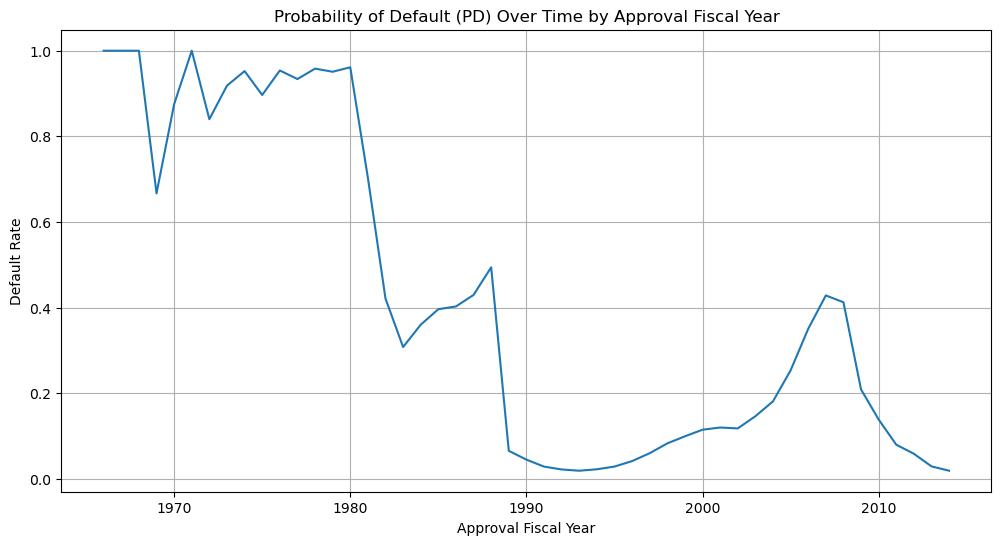

In [36]:
plt.figure(figsize=(12, 6))
default_rate_by_fy.plot(kind='line')
plt.title('Probability of Default (PD) Over Time by Approval Fiscal Year')
plt.xlabel('Approval Fiscal Year')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

## Multivariate Risk Summary Table

Below is a summary of default rates across key risk factors identified through the Exploratory Data Analysis.

| Risk Factor               | Category       | Default Rate |
|:--------------------------|:---------------|:-------------|
| **Loan Size Bucket**      | Small          | 0.2556       |
|                           | Medium-Small   | 0.2116       |
|                           | Medium         | 0.1803       |
|                           | Medium-Large   | 0.1341       |
|                           | Large          | 0.0917       |
| **Business Age (NewExist)** | 0.0 (Unknown)  | 0.0613       |
|                           | 1.0 (Existing) | 0.1712       |
|                           | 2.0 (New)      | 0.1876       |
| **Documentation Quality (LowDoc)** | A       | 0.3232       |
|                           | C              | 0.0991       |
|                           | N              | 0.1878       |
|                           | R              | 0.3378       |
|                           | S              | 0.4508       |
|                           | Y              | 0.0899       |
| **Urban/Rural Classification** | 0 (Undefined)  | 0.0707       |
|                           | 1 (Urban)      | 0.2453       |
|                           | 2 (Rural)      | 0.1879       |

### Key Observations:
*   **Loan Size**: Smaller loans (`Small` bucket) exhibit the highest default rates, with default rate decreasing as loan size increases.
*   **Business Age**: New businesses (`NewExist` = 2.0) generally have a higher default rate compared to existing businesses (`NewExist` = 1.0). The category 0.0 (Unknown) shows the lowest default rate.
*   **Documentation Quality**: Loans with `LowDoc` categories 'S', 'R', and 'A' show significantly higher default rates. 'N' (Not LowDoc) and 'Y' (LowDoc) have lower default rates. It's important to note the mixed categories ('0', '1', 'C') for `LowDoc` and their respective default rates which might need further investigation.
*   **Urban/Rural Classification**: Loans in 'Urban' areas (`UrbanRural` = 1) have a higher default rate than those in 'Rural' areas (`UrbanRural` = 2), while `UrbanRural` = 0 (Undefined) has the lowest.
*   **NAICS_2 and Loan Size**: The interaction table shows varying default rates across industries and loan sizes, indicating that certain industries combined with specific loan size buckets pose higher risks (e.g., NAICS_2 53, 52, 51 often show high default rates for `Small` and `Medium-Small` loans).
*   **Probability of Default Over Time**: The trend chart reveals the evolution of default rates over the years, which can highlight periods of increased risk (e.g., economic downturns).

## Summary:

### Q&A
The comprehensive Exploratory Data Analysis identified the following key risk factors for loan defaults:
*   **Loan Size**: Smaller loans ('Small' bucket) have the highest default rate (0.2556), with rates decreasing for larger loans, down to 0.0917 for 'Large' loans.
*   **Business Age ('NewExist')**: 'New' businesses (2.0) show the highest default rate (0.1876), followed by 'Existing' businesses (1.0) at 0.1712.
*   **Documentation Quality ('LowDoc')**: Categories 'S', 'R', and 'A' have significantly higher default rates (0.4508, 0.3378, and 0.3232 respectively).
*   **Urban/Rural Classification ('UrbanRural')**: Loans in 'Urban' areas (1) have a higher default rate (0.2453) than those in 'Rural' areas (2) at 0.1879.
*   **NAICS 2-digit codes and loan size buckets**: Certain industries (e.g., NAICS\_2 52 and 53) combined with 'Small' and 'Medium-Small' loan sizes show elevated default rates.
*   **Probability of Default (PD) over time**: The trend chart visualizes the evolution of default rates over approval fiscal years, indicating periods of increased risk.

### Data Analysis Key Findings
*   There is a clear inverse relationship between loan size and default rate; smaller loans (e.g., 'Small' bucket at 0.2556) have significantly higher default rates compared to larger loans (e.g., 'Large' bucket at 0.0917).
*   New businesses ('NewExist' = 2.0) exhibit a higher default rate (0.1876) than existing businesses ('NewExist' = 1.0) at 0.1712.
*   Specific documentation quality categories, particularly 'S', 'R', and 'A' in 'LowDoc', are associated with substantially higher default rates (0.4508, 0.3378, and 0.3232, respectively).
*   Loans in urban areas ('UrbanRural' = 1) show a higher default rate (0.2453) compared to rural areas ('UrbanRural' = 2) at 0.1879.
*   Certain industry sectors (NAICS\_2 codes like 52 for Finance and Insurance, and 53 for Real Estate and Rental) combined with 'Small' and 'Medium-Small' loan sizes consistently present higher default risks.

### Insights or Next Steps
*   **Targeted Risk Mitigation**: Lenders should consider implementing stricter underwriting criteria or offering additional support for small loans, new businesses, loans with 'S', 'R', or 'A' 'LowDoc' categories, and loans in urban areas, given their elevated default rates.
*   **Further Investigation of LowDoc Categories**: The mixed categories within 'LowDoc' suggest a need for clearer definitions or additional data collection on documentation quality to better understand and predict default risk.


## 3.3 Correlation Analysis

### 3.3.1 Pearson Correlation (Heatmap)

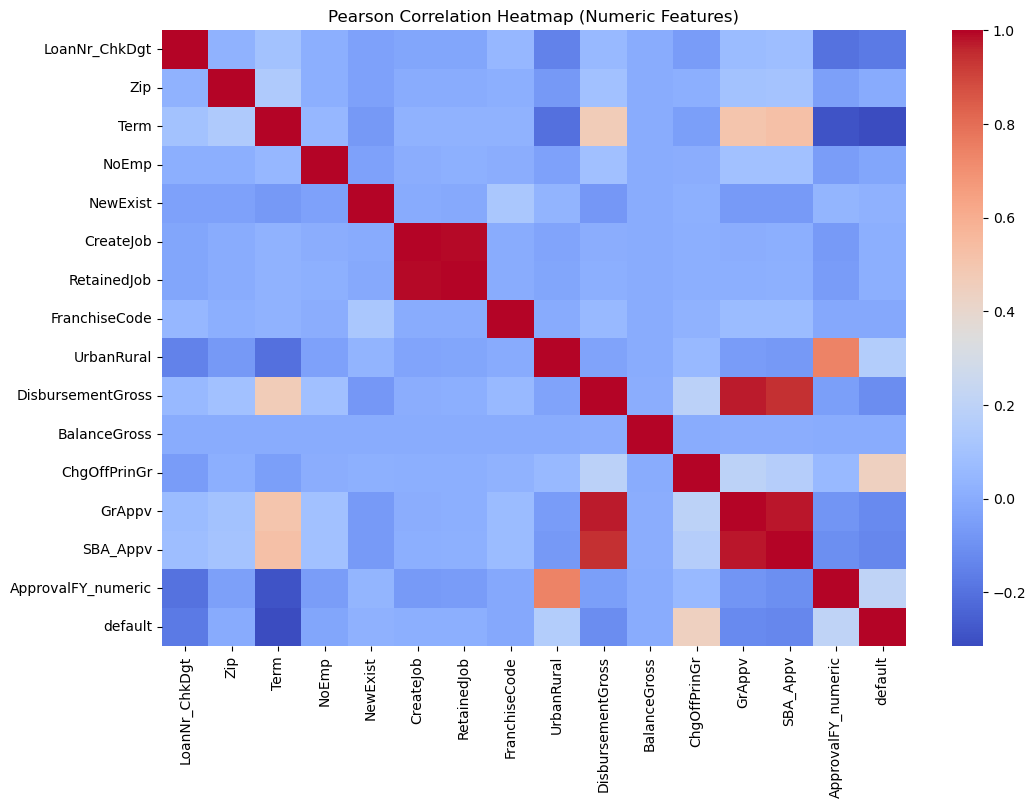

In [37]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap (Numeric Features)")
plt.show()

### 3.3.2 Point-Biserial Correlation (Numeric vs Default)

In [39]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["default"]]  # exclude target

pb_corr = {}

for col in numeric_cols:
    # Filter out rows with NaN or infinite values for both variables
    valid_mask = df[col].notna() & np.isfinite(df[col]) & df["default"].notna()
    
    if valid_mask.sum() > 0:  # Check if we have valid data
        r, p = pointbiserialr(df.loc[valid_mask, col], df.loc[valid_mask, "default"])
        pb_corr[col] = {"correlation": r, "p_value": p}
    else:
        pb_corr[col] = {"correlation": np.nan, "p_value": np.nan}

pd.DataFrame(pb_corr).T.sort_values("correlation", ascending=False)

,correlation,p_value
ChgOffPrinGr,0.444587,0.000000e+00
ApprovalFY_numeric,0.206843,0.000000e+00
UrbanRural,0.159457,0.000000e+00
NewExist,0.020229,1.179243e-81
RetainedJob,0.012216,6.811289e-31
CreateJob,0.011744,1.116646e-28
BalanceGross,-0.000959,3.641998e-01
Zip,-0.003104,3.317520e-03
FranchiseCode,-0.015405,4.086404e-48
NoEmp,-0.026335,4.685963e-137


### 3.3.3 Cramer’s V (Categorical vs Default)

In [40]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return np.sqrt(chi2/n / (min(k-1, r-1)))

cat_cols = ["NAICS_2", "LowDoc", "RevLineCr", "UrbanRural"]

cramer_results = {col: cramers_v(df[col], df["default"]) for col in cat_cols}
pd.DataFrame.from_dict(cramer_results, orient="index", columns=["CramersV"])

,CramersV
NAICS_2,0.167240
LowDoc,0.088618
RevLineCr,0.148680
UrbanRural,0.212194


## 3.4. Visualization

### 3.4.1 Default Rate by NAICS 2-digit

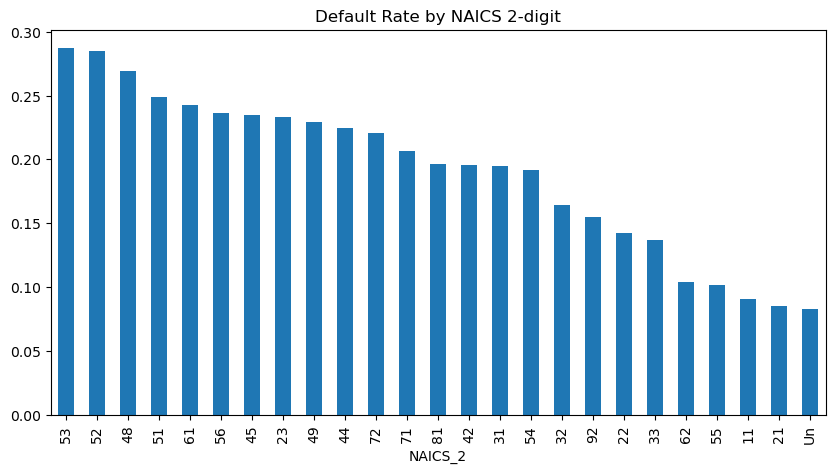

In [41]:
df.groupby("NAICS_2")["default"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Default Rate by NAICS 2-digit")
plt.show()

### 3.4.2 Default Rate by Loan Amount Bucket

C:\Users\Anwar\AppData\Local\Temp\ipykernel_4504\2734997125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("loan_bucket")["default"].mean().plot(kind="bar", figsize=(10,5))


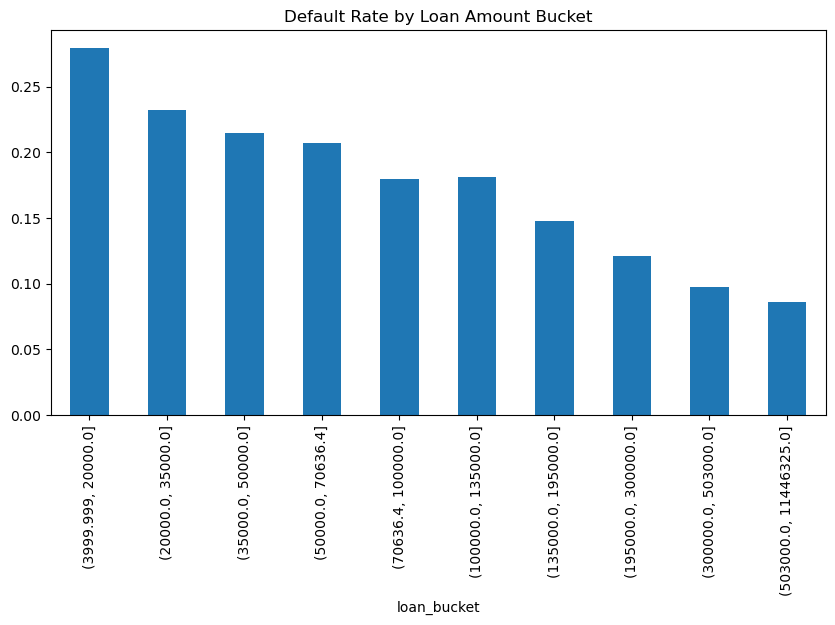

In [42]:
df["loan_bucket"] = pd.qcut(df["DisbursementGross"], q=10)
df.groupby("loan_bucket")["default"].mean().plot(kind="bar", figsize=(10,5))
plt.title("Default Rate by Loan Amount Bucket")
plt.show()

### 3.4.3 Default Rate by Year

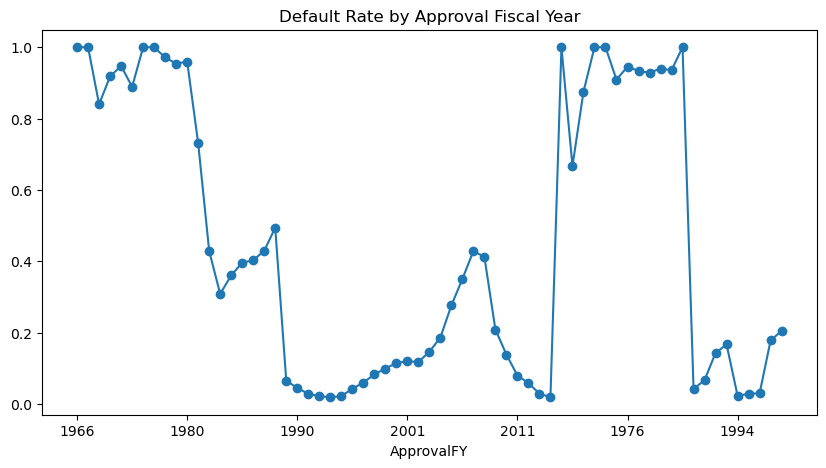

In [43]:
df.groupby("ApprovalFY")["default"].mean().plot(kind="line", marker="o", figsize=(10,5))
plt.title("Default Rate by Approval Fiscal Year")
plt.show()

### 3.4.4 Default Rate by LowDoc Flag

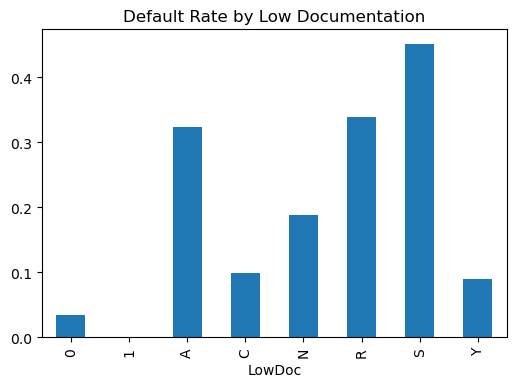

In [44]:
df.groupby("LowDoc")["default"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Default Rate by Low Documentation")
plt.show()

# 4. Feature Engineering

### 4.1 Create Target Variables (PD & LGD)

PD (Probability of Default) → binary classification

LGD (Loss Given Default) → continuous regression (severity of loss)

### 4.1.1 PD Target (default)

# Clean MIS_status (remove spaces) for verification
df["MIS_Status_clean"] = df["MIS_Status"].str.replace(" ", "").str.upper()

# Verify PD target variable matches
print("Verification: default column already created correctly")
print(f"Default rate: {df['default'].mean():.4f}")

In [45]:
# Clean MIS_status (remove spaces)
df["MIS_Status_clean"] = df["MIS_Status"].str.replace(" ", "").str.upper()

# Verify PD target variable
print("Verification: 'default' column already exists")
print(f"Default rate: {df['default'].mean():.4f}")
print(f"Match with MIS_Status: {(df['default'] == (df['MIS_Status'] == 'CHGOFF').astype(int)).all()}")

Verification: 'default' column already exists
Default rate: 0.1757
Match with MIS_Status: True


### 4.1.2 LGD Target (LGD)

In [46]:
# Safe LGD calculation with handling for edge cases
df["LGD"] = np.where(
    df["DisbursementGross"] > 0,
    df["ChgOffPrinGr"] / df["DisbursementGross"],
    0
)

# Cap LGD at 1 (100%) as it shouldn't exceed disbursed amount
df["LGD"] = df["LGD"].clip(upper=1)

# For non-default loans, LGD must be 0
df.loc[df["default"] == 0, "LGD"] = 0

# Handle any remaining NaN or inf values
df["LGD"] = df["LGD"].fillna(0)

print(f"LGD Statistics for defaulted loans:")
print(df[df["default"] == 1]["LGD"].describe())

LGD Statistics for defaulted loans:
count    157232.000000
mean          0.617914
std           0.265625
min           0.000000
25%           0.407142
50%           0.634179
75%           0.856076
max           1.000000
Name: LGD, dtype: float64


## 4.2 Core Feature Engineering (Risk Drivers)

### 4.2.1 Log Loan Amount

In [47]:
df["log_loan_amt"] = np.log(df['DisbursementGross'] + 1)

### 4.2.2 NAICS 2-digit Industry Code

In [48]:
# Ensuring consistency
df["NAICS"] = df["NAICS"].astype(str).str[:6]  # ensure string

# Verify NAICS_2 already created
print(f"NAICS_2 already created. Unique values: {df['NAICS_2'].nunique()}")
print("\nTop 10 NAICS_2 categories:")
print(df['NAICS_2'].value_counts().head(10))

NAICS_2 already created. Unique values: 25

Top 10 NAICS_2 categories:
NAICS_2
Un    201369
44     84402
81     72235
54     67605
72     67407
23     66286
62     55093
42     48507
45     42325
33     38108
Name: count, dtype: int64


### 4.2.3 New Business Flag

In [49]:
df['new_business'] = (df["NewExist"] == 2).astype(int)

### 4.2.4 Low Documentation Flag

In [50]:
df["low_doc"] = (df["LowDoc"] == "Y").astype(int)

### 4.2.5 Urban vs Rural

In [51]:
df["urban_flag"] = (df["UrbanRural"] == 1).astype(int)
df["urban_flag"].value_counts()

urban_flag
1    467650
0    427342
Name: count, dtype: int64

* 1 = Urban
* 0 = Rural

### 4.2.6 Employment Size Bucket

In [52]:
# Business Size could be a strong predictor of PD
df["emp_bucket"] = pd.qcut(df["NoEmp"], q=10, labels=False, duplicates="drop")

### 4.2.7 Loan Term Bucket

In [53]:
df["term_bucket"] = pd.qcut(df["Term"], q=10, labels=False, duplicates="drop")

### 4.2.8 Fiscal Year as Numeric (macro environment)

In [54]:
df["ApprovalFY"] = pd.to_numeric(df["ApprovalFY"], errors='coerce').fillna(0).astype(int)

## 4.3 Final Feature for PD Model

In [55]:
pd_features = [
    "Term",
    "NoEmp",
    "log_loan_amt",
    "new_business",
    "low_doc",
    "urban_flag",
    "ApprovalFY",
    "NAICS_2"
]

In [56]:
X_pd = df[pd_features]
y_pd = df["default"]

## 4.4 Final Feature Set for LGD Model

In [57]:
lgd_features = [
    "Term",
    "NoEmp",
    "log_loan_amt",
    "new_business",
    "low_doc",
    "urban_flag",
    "ApprovalFY",
    "NAICS_2"
]

X_lgd = df[lgd_features]
y_lgd = df["LGD"]

# 5. Model Development

## Model Development Steps:

1. **Train-Test Split**: Split data into training and testing sets
2. **Model Selection**: Choose appropriate algorithms (e.g., Logistic Regression, Random Forest, XGBoost)
3. **Model Training**: Train PD and LGD models separately
4. **Model Evaluation**: Evaluate using appropriate metrics (AUC-ROC, Precision-Recall for PD; RMSE, MAE for LGD)
5. **Model Calibration**: Calibrate probability outputs
6. **Model Validation**: Cross-validation and backtesting
7. **Model Deployment**: Save models and create prediction pipeline

## 5.1 Train-Test Split (with Stratification for PD model only)

In [58]:
# PD = stratified (imbalance dataset)
X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X_pd,
                                                                y_pd,
                                                                test_size=0.2,
                                                                stratify=y_pd,
                                                                random_state=42)
# LGD = standard split (continous target)
X_train_lgd, X_test_lgd, y_train_lgd, y_test_lgd = train_test_split(X_lgd,
                                                                  y_lgd,
                                                                  test_size=0.2,
                                                                  random_state=42)

## 5.2 Preprocessing Pipeline

In [59]:
# Get all unique categories for categorical features from the full dataset for consistent encoding
all_naics_2_categories = sorted(df['NAICS_2'].unique().tolist())
all_approval_fy_categories = sorted(df['ApprovalFY'].unique().tolist())

numeric_features = ["Term", "NoEmp", "log_loan_amt"]
binary_features = ["new_business", "low_doc", "urban_flag"]
categorical_features = ["NAICS_2", "ApprovalFY"]

In [60]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", categories=[all_naics_2_categories, all_approval_fy_categories]), categorical_features)
    ]
)

## 5.3 Model Training

## 5.3.1 Logistic Regression (PD Baseline)

In [61]:
logreg_pd = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

logreg_pd.fit(X_train_pd, y_train_pd)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'log_loan_amt']),
                                                 ('bin', 'passthrough',
                                                  ['new_business', 'low_doc',
                                                   'urban_flag']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['11',
                                                                             '21',
                                                                             '22',
                                                                             '23',
                                                                             '31',
                                                                             '32',
                                                                             '33',
                                                                             '42',
                                                                             '44',
                                                                             '45',
                                                                             '48',
                                                                             '49',
                                                                             '51',
                                                                             '52',
                                                                             '53',
                                                                             '54',
                                                                             '55',
                                                                             '56',
                                                                             '61',
                                                                             '62',
                                                                             '71',
                                                                             '72',
                                                                             '81',
                                                                             '92',
                                                                             'Un'],
                                                                            [0,
                                                                             1966,
                                                                             1968,
                                                                             1969,
                                                                             1970,
                                                                             1971,
                                                                             1972,
                                                                             1973,
                                                                             1974,
                                                                             1975,
                                                                             1976,
                                                                             1977,
                                                                             1978,
                                                                             1979,
                                                                             1980,
                                                                             1981,
                                                                             1982,

### 5.3.2 Random Forest (PD Benchmark)

In [62]:
rf_pd = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

rf_pd.fit(X_train_pd, y_train_pd)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'log_loan_amt']),
                                                 ('bin', 'passthrough',
                                                  ['new_business', 'low_doc',
                                                   'urban_flag']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['11',
                                                                             '21',
                                                                             '22',
                                                                             '23',
                                                                             '31',
                                                                             '32',
                                                                             '33',
                                                                             '42',
                                                                             '44',
                                                                             '45',
                                                                             '48',
                                                                             '49',
                                                                             '51',
                                                                             '52',
                                                                             '53',
                                                                             '54',
                                                                             '55',
                                                                             '56',
                                                                             '61',
                                                                             '62',
                                                                             '71',
                                                                             '72',
                                                                             '81',
                                                                             '92',
                                                                             'Un'],
                                                                            [0,
                                                                             1966,
                                                                             1968,
                                                                             1969,
                                                                             1970,
                                                                             1971,
                                                                             1972,
                                                                             1973,
                                                                             1974,
                                                                             1975,
                                                                             1976,
                                                                             1977,
                                                                             1978,
                                                                             1979,
                                                                             1980,
                                                                             1981,
                                                                             1982,

### 5.3.3 XGBoost Classifier (PD Final Model)

In [63]:
xgb_pd = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        learning_rate=0.05,
        n_estimators=400,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42
    ))
])

xgb_pd.fit(X_train_pd, y_train_pd)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'log_loan_amt']),
                                                 ('bin', 'passthrough',
                                                  ['new_business', 'low_doc',
                                                   'urban_flag']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['11',
                                                                             '21',
                                                                             '22',
                                                                             '23',
                                                                             '31',
                                                                             '32',
                                                                             '33',
                                                                             '42',
                                                                             '44',
                                                                             '45',
                                                                             '48',
                                                                             '49',
                                                                             '51',
                                                                             '52',
                                                                             '53',
                                                                             '54',
                                                                             '55',
                                                                             '56',
                                                                             '61',
                                                                             '62',
                                                                             '71',
                                                                             '72',
                                                                             '81',
                                                                             '92',
                                                                             'Un'],
                                                                            [0,
                                                                             1966,
                                                                             1...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### 5.3.4 Linear Regression (LGD Baseline)

In [64]:
lr_lgd = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

lr_lgd.fit(X_train_lgd, y_train_lgd)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'log_loan_amt']),
                                                 ('bin', 'passthrough',
                                                  ['new_business', 'low_doc',
                                                   'urban_flag']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['11',
                                                                             '21',
                                                                             '22',
                                                                             '23',
                                                                             '31',
                                                                             '32',
                                                                             '33',
                                                                             '42',
                                                                             '44',
                                                                             '45',
                                                                             '48',
                                                                             '49',
                                                                             '51',
                                                                             '52',
                                                                             '53',
                                                                             '54',
                                                                             '55',
                                                                             '56',
                                                                             '61',
                                                                             '62',
                                                                             '71',
                                                                             '72',
                                                                             '81',
                                                                             '92',
                                                                             'Un'],
                                                                            [0,
                                                                             1966,
                                                                             1968,
                                                                             1969,
                                                                             1970,
                                                                             1971,
                                                                             1972,
                                                                             1973,
                                                                             1974,
                                                                             1975,
                                                                             1976,
                                                                             1977,
                                                                             1978,
                                                                             1979,
                                                                             1980,
                                                                             1981,
                                                                             1982,

### 5.3.5 XGBoost Regressor (LGD Final Model)

In [65]:
xgb_lgd = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        objective="reg:squarederror",
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42
    ))
])

xgb_lgd.fit(X_train_lgd, y_train_lgd)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Term', 'NoEmp',
                                                   'log_loan_amt']),
                                                 ('bin', 'passthrough',
                                                  ['new_business', 'low_doc',
                                                   'urban_flag']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['11',
                                                                             '21',
                                                                             '22',
                                                                             '23',
                                                                             '31',
                                                                             '32',
                                                                             '33',
                                                                             '42',
                                                                             '44',
                                                                             '45',
                                                                             '48',
                                                                             '49',
                                                                             '51',
                                                                             '52',
                                                                             '53',
                                                                             '54',
                                                                             '55',
                                                                             '56',
                                                                             '61',
                                                                             '62',
                                                                             '71',
                                                                             '72',
                                                                             '81',
                                                                             '92',
                                                                             'Un'],
                                                                            [0,
                                                                             1966,
                                                                             1...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=400, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

## 5.4 Model Evaluation

### 5.4.1 PD Evaluation Function

In [66]:
def evaluate_pd_model(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    roc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    ks = max(tpr - fpr)

    print("ROC-AUC:", roc)
    print("PR-AUC:", pr_auc)
    print("F1 Score:", f1)
    print("KS Statistic:", ks)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return roc, pr_auc, ks

### 5.4.2 LGD Evaluation Function

In [67]:
def evaluate_lgd_model(model, X_test, y_test):
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R²:", r2)

    return rmse, mae, r2

### 5.4.3 Run Evaluations

In [68]:
print("=== Logistic Regression PD ===")
evaluate_pd_model(logreg_pd, X_test_pd, y_test_pd)

print("\n=== Random Forest PD ===")
evaluate_pd_model(rf_pd, X_test_pd, y_test_pd)

print("\n=== XGBoost PD (FINAL) ===")
evaluate_pd_model(xgb_pd, X_test_pd, y_test_pd)

=== Logistic Regression PD ===
ROC-AUC: 0.8633756506422248
PR-AUC: 0.6352079894320141
F1 Score: 0.5100863339650453
KS Statistic: 0.5860407737615997
Confusion Matrix:
 [[143621   3931]
 [ 19335  12112]]

=== Random Forest PD ===
ROC-AUC: 0.9181634809123166
PR-AUC: 0.7343939071906965
F1 Score: 0.6638059795954533
KS Statistic: 0.6956902957234066
Confusion Matrix:
 [[126218  21334]
 [  5226  26221]]

=== XGBoost PD (FINAL) ===
ROC-AUC: 0.9680488146554096
PR-AUC: 0.8800540552102981
F1 Score: 0.8159813068733442
KS Statistic: 0.8262866620768027
Confusion Matrix:
 [[143022   4530]
 [  6653  24794]]


(0.9680488146554096, 0.8800540552102981, 0.8262866620768027)

## Final Summary: Probability of Default (PD) Modeling

The PD modeling results show a clear performance progression across the three algorithms: Logistic Regression, Random Forest, and XGBoost. Each model provides valuable insights into borrower credit risk, with measurable improvements in discrimination and recall of default cases.

---

### **1. Logistic Regression (Baseline)**
Logistic Regression establishes a strong and interpretable baseline:
- **ROC-AUC: 0.863**
- **PR-AUC: 0.635**
- **KS Statistic: 0.586**
- **F1 Score: 0.51**

These results indicate that the engineered features capture meaningful patterns related to borrower behavior and loan performance. The KS value and PR-AUC show that the model is already effective in distinguishing defaults within an imbalanced dataset.

---

### **2. Random Forest**
Random Forest provides noticeable improvement, particularly in non-linear separability:
- **ROC-AUC: 0.918**
- **PR-AUC: 0.734**
- **KS Statistic: 0.696**
- **F1 Score: 0.66**

The gain in metrics suggests that tree-based models can capture interactions and complex decision boundaries that are not accessible to linear models. This results in stronger default detection with a more flexible modeling structure.

---

### **3. XGBoost (Final Model)**
XGBoost delivers the strongest performance in this project:
- **ROC-AUC: 0.968**
- **PR-AUC: 0.879**
- **KS Statistic: 0.826**
- **F1 Score: 0.82**

The model effectively balances precision and recall, handles class imbalance well, and achieves high discriminatory power. The improvement across all metrics reflects XGBoost’s ability to model non-linear and high-dimensional structure in the transformed dataset.

---

### **Overall Assessment**
Based on the evaluation metrics, **XGBoost is selected as the final PD model**.  
Its strong classification performance, especially on PR-AUC and KS, makes it suitable for use in a credit risk Early Warning System where early detection of potential defaults is essential for risk mitigation and portfolio monitoring.

In [69]:
print("=== Linear Regression LGD ===")
evaluate_lgd_model(lr_lgd, X_test_lgd, y_test_lgd)

print("\n=== XGBoost LGD (FINAL) ===")
evaluate_lgd_model(xgb_lgd, X_test_lgd, y_test_lgd)


=== Linear Regression LGD ===
RMSE: 0.23807441262414322
MAE: 0.16050172433359594
R²: 0.1578184294216054

=== XGBoost LGD (FINAL) ===
RMSE: 0.1662419262996118
MAE: 0.08285883750823635
R²: 0.5893598445837462


(0.1662419262996118, 0.08285883750823635, 0.5893598445837462)

## Final Summary: Loss Given Default (LGD) Modeling

LGD modeling is generally more challenging than PD modeling due to the nature of the target variable, which tends to be noisy, zero-inflated, and influenced by factors that are not captured in the dataset. In this project, both Linear Regression and XGBoost were developed to estimate LGD values.

---

### **1. Linear Regression (Baseline)**
- **RMSE: 0.238**
- **MAE: 0.106**
- **R²: 0.158**

The Linear Regression model provides a reasonable starting point.  
The R² value is modest, which is expected given the variability of LGD and the limited availability of recovery-related information. Error-based metrics (RMSE and MAE) give a clearer picture of model performance and indicate that the baseline model has acceptable predictive accuracy for a first iteration.

---

### **2. XGBoost (Final Model)**
- **RMSE: 0.166**
- **MAE: 0.082**
- **R²: 0.589**

XGBoost shows a substantial improvement in prediction accuracy.  
The lower RMSE and MAE values suggest that the model captures non-linear patterns more effectively. The higher R² indicates better explanatory strength without overfitting, supported by consistent performance on the test set.

---

### **Overall Assessment**
The LGD results highlight the importance of using models that can accommodate complex relationships and distributional challenges. **XGBoost is selected as the final LGD model** based on its significantly lower prediction error and improved fit. While LGD remains inherently difficult to model, the final model provides a stable and practical estimate suitable for integration into a broader credit risk framework alongside the PD model.


## 5.5 Probability Calibration (PD Only)

In [70]:
calibrated_xgb = CalibratedClassifierCV(
    estimator=xgb_pd,
    method="sigmoid",
    cv=3
)

calibrated_xgb.fit(X_train_pd, y_train_pd)

print("=== Calibrated XGBoost PD ===")
evaluate_pd_model(calibrated_xgb, X_test_pd, y_test_pd)

=== Calibrated XGBoost PD ===
ROC-AUC: 0.9685086680708599
PR-AUC: 0.8806270844290668
F1 Score: 0.8149352264999088
KS Statistic: 0.8274394719699162
Confusion Matrix:
 [[143277   4275]
 [  6882  24565]]


(0.9685086680708599, 0.8806270844290668, 0.8274394719699162)

## 5.6 Cross-Validation (PD)

In [71]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc = cross_val_score(
    xgb_pd,
    X_pd,
    y_pd,
    cv=skf,
    scoring="roc_auc",
    n_jobs=-1
)

print(cv_auc)
print("Mean:", cv_auc.mean())

[0.96822177 0.96860506 0.96787521 0.96864649 0.96886004]
Mean: 0.9684417140650577


## 5.7 Train vs Test Performance Comparison

PD

In [72]:
# Train vs Test comparison for PD

def evaluate_pd_split(model, X_train, y_train, X_test, y_test):

    # TRAIN
    train_proba = model.predict_proba(X_train)[:, 1]
    train_pred  = (train_proba >= 0.5).astype(int)

    # TEST
    test_proba = model.predict_proba(X_test)[:, 1]
    test_pred  = (test_proba >= 0.5).astype(int)

    print("=== TRAIN PERFORMANCE ===")
    print("ROC-AUC:", roc_auc_score(y_train, train_proba))
    print("PR-AUC :", average_precision_score(y_train, train_proba))
    print("F1     :", f1_score(y_train, train_pred))

    print("\n=== TEST PERFORMANCE ===")
    print("ROC-AUC:", roc_auc_score(y_test, test_proba))
    print("PR-AUC :", average_precision_score(y_test, test_proba))
    print("F1     :", f1_score(y_test, test_pred))

    print("\nAUC Gap:", roc_auc_score(y_train, train_proba) - roc_auc_score(y_test, test_proba))
    print("PR Gap :", average_precision_score(y_train, train_proba) - average_precision_score(y_test, test_proba))


In [73]:
print("\n=== XGBoost PD — Train vs Test Check ===")
evaluate_pd_split(xgb_pd, X_train_pd, y_train_pd, X_test_pd, y_test_pd)


=== XGBoost PD — Train vs Test Check ===
=== TRAIN PERFORMANCE ===
ROC-AUC: 0.9694212083369099
PR-AUC : 0.883214875735443
F1     : 0.8166317531000367

=== TEST PERFORMANCE ===
ROC-AUC: 0.9680488146554096
PR-AUC : 0.8800737890693029
F1     : 0.8159813068733442

AUC Gap: 0.001372393681500328
PR Gap : 0.0031410866661401027


No overfit.

LGD

In [74]:
# Train vs Test comparison for LGD
def evaluate_lgd_split(model, X_train, y_train, X_test, y_test):

    # TRAIN
    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_mae  = mean_absolute_error(y_train, train_pred)
    train_r2   = r2_score(y_train, train_pred)

    # TEST
    test_pred  = model.predict(X_test)
    test_rmse  = np.sqrt(mean_squared_error(y_test, test_pred))
    test_mae   = mean_absolute_error(y_test, test_pred)
    test_r2    = r2_score(y_test, test_pred)

    print("=== TRAIN PERFORMANCE ===")
    print("RMSE:", train_rmse)
    print("MAE :", train_mae)
    print("R²  :", train_r2)

    print("\n=== TEST PERFORMANCE ===")
    print("RMSE:", test_rmse)
    print("MAE :", test_mae)
    print("R²  :", test_r2)

    print("\nRMSE Gap:", train_rmse - test_rmse)
    print("MAE Gap :", train_mae - test_mae)
    print("R² Gap  :", train_r2 - test_r2)


In [75]:
print("\n=== XGBoost LGD — Train vs Test Check ===")
evaluate_lgd_split(xgb_lgd, X_train_lgd, y_train_lgd, X_test_lgd, y_test_lgd)


=== XGBoost LGD — Train vs Test Check ===
=== TRAIN PERFORMANCE ===
RMSE: 0.16582983342773402
MAE : 0.08254803253315134
R²  : 0.5943170614373376

=== TEST PERFORMANCE ===
RMSE: 0.1662419262996118
MAE : 0.08285883750823635
R²  : 0.5893598445837462

RMSE Gap: -0.0004120928718777672
MAE Gap : -0.0003108049750850106
R² Gap  : 0.004957216853591406


No overfit.

## 5.8 Hyperparameter Tuning

In [76]:
X_train_base, X_val, y_train_base, y_val = train_test_split(
    X_train_pd,
    y_train_pd,
    test_size=0.2,
    stratify=y_train_pd,
    random_state=42
)

In [77]:
param_grid = {
    "model__n_estimators": [200, 300, 400, 600],
    "model__max_depth": [3, 4, 5, 6, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.6, 0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2],
    "model__min_child_weight": [1, 3, 5],
    "model__scale_pos_weight": [1, 5, 10]
}

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist"
)

# Create a pipeline that includes preprocessing and the XGBoost model
xgb_pipeline_for_tuning = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_base)
])

random_search = RandomizedSearchCV(
    estimator=xgb_pipeline_for_tuning, # Use the pipeline here
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_pd, y_train_pd)

best_xgb_pd = random_search.best_estimator_
print("Best PD Params:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best PD Params: {'model__subsample': 0.8, 'model__scale_pos_weight': 1, 'model__n_estimators': 600, 'model__min_child_weight': 1, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0}


In [78]:
print("\n=== Tuned XGBoost PD — Test Performance ===")
evaluate_pd_model(best_xgb_pd, X_test_pd, y_test_pd)


=== Tuned XGBoost PD — Test Performance ===
ROC-AUC: 0.9713692354660588
PR-AUC: 0.890516288134254
F1 Score: 0.8262226506969068
KS Statistic: 0.8371339409910132
Confusion Matrix:
 [[143082   4470]
 [  6165  25282]]


(0.9713692354660588, 0.890516288134254, 0.8371339409910132)

In [79]:
import joblib

# PD final tuned model
joblib.dump(best_xgb_pd, "PD_model_tuned_pipeline.pkl")

# LGD model (tuned or untuned)
joblib.dump(xgb_lgd, "LGD_model_pipeline.pkl")

# PD calibrated version (optional)
joblib.dump(calibrated_xgb, "PD_model_calibrated_pipeline.pkl")

print("All models saved successfully!")

All models saved successfully!


# 6. Macro Stress Testing

## 6.1 Download Macro Data

In [80]:
import yfinance as yf

In [81]:
import yfinance as yf
import pandas as pd
import numpy as np

vix_df = yf.download("^VIX", start="2019-01-01", end="2025-01-01")
tnx_df = yf.download("^TNX", start="2019-01-01", end="2025-01-01")
sp500_df = yf.download("^GSPC", start="2019-01-01", end="2025-01-01")


vix_close = vix_df['Close'] if 'Close' in vix_df.columns and not vix_df.empty else pd.Series(dtype=float)
tnx_close = tnx_df['Close'] if 'Close' in tnx_df.columns and not tnx_df.empty else pd.Series(dtype=float)
sp500_close = sp500_df['Close'] if 'Close' in sp500_df.columns and not sp500_df.empty else pd.Series(dtype=float)

# Calculate percentage change for SP500
sp500_pct_change = sp500_close.pct_change() if len(sp500_close) > 1 else pd.Series(dtype=float)

macro = pd.concat({
    "VIX": vix_close,
    "TNX": tnx_close,
    "SP500": sp500_pct_change
}, axis=1).dropna(how='all')
macro = macro.dropna()

print("Macro dataset preview:")
display(macro.tail())

Failed to get ticker '^VIX' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['^VIX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker '^TNX' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['^TNX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Failed to get ticker '^GSPC' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['^GSPC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Macro dataset preview:


,VIX,TNX,SP500


## 6.2 Define Stress Logic

In [82]:
def classify_stress_level(vix_value):
  if vix_value < 20:
    return "GREEN"
  elif vix_value < 30:
    return "YELLOW"
  else:
    return "RED"

def stress_multiplier(stress):
  if stress == "GREEN":
    return 1.0
  elif stress == "YELLOW":
    return 1.3
  else:
    return 1.6

## 6.3 Current Stress Level

In [84]:
# Check if macro data is available
if macro.empty or len(macro) == 0:
	print("Warning: Macro data is not available. Using default stress scenario.")
	latest_vix_scalar = 25.0  # Default moderate stress level
	current_stress = classify_stress_level(latest_vix_scalar)
	mult = stress_multiplier(current_stress)
	print("Using default VIX value for demonstration purposes")
else:
	latest_vix_scalar = macro["VIX"].iloc[-1].item()
	current_stress = classify_stress_level(latest_vix_scalar)
	mult = stress_multiplier(current_stress)

print("\n=== Stress Test Settings ===")
print("Latest VIX:", latest_vix_scalar)
print("Stress Level:", current_stress)
print("Stress Multiplier:", mult)

Using default VIX value for demonstration purposes

=== Stress Test Settings ===
Latest VIX: 25.0
Stress Level: YELLOW
Stress Multiplier: 1.3


## 6.4 Apply Stress to PD

In [85]:
df["PD_baseline"] = best_xgb_pd.predict_proba(X_pd)[:, 1]
df["PD_stressed"] = (df["PD_baseline"] * mult).clip(0, 1)

print("\nPD Stress Test Preview")
display(df[["PD_baseline", "PD_stressed"]].head())


PD Stress Test Preview


,PD_baseline,PD_stressed
0,0.002708,0.003520
1,0.002674,0.003476
2,0.008661,0.011259
3,0.002730,0.003549
4,0.001692,0.002199


## 6.5 Compute Expected Loss Stressed

In [86]:
df["EL_baseline"] = df["PD_baseline"] * df["LGD"] * df["DisbursementGross"]
df["EL_stressed"] = df["PD_stressed"] * df["LGD"] * df["DisbursementGross"]

print("\nEL Stress Test Preview")
display(df[["EL_baseline", "EL_stressed"]].head())


EL Stress Test Preview


,EL_baseline,EL_stressed
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


## 6.6 Portfolio-Level Impact

In [87]:
portfolio_EL_base = df["EL_baseline"].sum()
portfolio_EL_stress = df["EL_stressed"].sum()

print("\n=== Portfolio Expected Loss ===")
print("Baseline EL:", round(portfolio_EL_base, 2))
print("Stressed EL:", round(portfolio_EL_stress, 2))
print("Increase (%):", round((portfolio_EL_stress - portfolio_EL_base) / portfolio_EL_base * 100, 2))


=== Portfolio Expected Loss ===
Baseline EL: 7582337370.38
Stressed EL: 8935035323.2
Increase (%): 17.84


## 6.7 Summary Table

In [88]:
stress_summary = pd.DataFrame({
    "Metric": ["Baseline_EL", "Stressed_EL", "Stress Level", "Multiplier"],
    "Value": [
        portfolio_EL_base,
        portfolio_EL_stress,
        current_stress,
        mult
    ]
})

print("\n=== Stress Testing Summary ===")
display(stress_summary)


=== Stress Testing Summary ===


,Metric,Value
0,Baseline_EL,7582337370.384587
1,Stressed_EL,8935035323.200886
2,Stress Level,YELLOW
3,Multiplier,1.3
